Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os #Handling Directories
import librosa 
import wave #Read and Write audio data

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier #Neural networks , Classification
from sklearn.metrics import accuracy_score

In [4]:
# LSTM Classifier
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

Connect Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Extract Features from Audio

In [6]:
def extract_mfcc(wav_file_name):
    y, sr = librosa.load(wav_file_name)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)

    return mfccs

Load Dataset

In [7]:
rav_labels = [] #Labels
rav_data = [] #Features
for dirname, _, filenames in os.walk('/content/drive/MyDrive/ravdess-emotional-speech-audio'):
    for filename in filenames:
        rav_labels.append(int(filename[7:8]) - 1)
        wav_file_name = os.path.join(dirname, filename)
        rav_data.append(extract_mfcc(wav_file_name))
rav_data

[array([-5.5007660e+02,  4.0311600e+01, -8.2569237e+00,  1.8153483e+00,
         1.6538182e+00, -6.2557726e+00, -4.4693904e+00, -5.2624159e+00,
        -9.8674135e+00, -5.6863518e+00, -3.7085922e+00, -6.2167754e+00,
        -4.1688910e+00, -3.5300577e+00, -6.0576243e+00, -5.6540769e-01,
        -6.4478416e+00, -3.5198357e+00, -4.6356711e+00, -5.9116321e+00,
        -6.1400452e+00, -2.3705890e+00, -2.9361265e+00, -3.5296700e+00,
        -3.9705343e+00,  8.8149786e-01, -2.9713216e+00,  2.1017375e+00,
         1.6189029e+00,  1.8197054e+00,  2.1228015e+00,  2.0291669e+00,
         6.0243537e-03,  3.5069785e-01, -1.5169089e+00,  2.9222763e-01,
        -9.5406212e-02,  1.1825075e+00, -4.6495599e-01,  1.6673770e+00],
       dtype=float32),
 array([-5.69063538e+02,  4.84466896e+01, -1.65668786e+00,  7.91847610e+00,
         4.82066363e-01, -1.31725895e+00, -4.46599150e+00, -5.66130257e+00,
        -1.06437368e+01, -5.63526344e+00, -4.78170335e-01, -5.29977894e+00,
        -3.77054739e+00, -2.

Convert Data to Array

In [17]:
rav_array = np.asarray(rav_data)
rav_label_array = np.array(rav_labels)
rav_label_array.shape

(2880,)

Convert Categorical , Class Vector"Integer" to Binary Class Matrix

In [9]:
label_cat = to_categorical(rav_label_array)
label_cat.shape

(2880, 8)

In [10]:
rav_array.shape

(2880, 40)

Spliting the Dataset into Training and Testing Part

In [11]:
x_train,x_test,y_train,y_test= train_test_split(np.array(rav_data),label_cat, test_size=0.20)

Spliting into Training , Validation , Testing Part

In [12]:
Total_samples = rav_array.shape[0]
train_samples = int(Total_samples * 0.8)
validate_samples = int(Total_samples * 0.1)
test_samples = int(Total_samples * 0.1)


LSTM MODEL

In [13]:
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))

    # Configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model


Create Subset of Original Array Containing Samples of Training.
Convert 2D to 3D array by adding a new Dimensional.

In [14]:
New = np.expand_dims(rav_array[:train_samples],-1)

In [15]:
New.shape

(2304, 40, 1)

Train the Model

In [19]:
### train using LSTM model
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(rav_array[:train_samples],-1), label_cat[:train_samples], validation_data=(np.expand_dims(rav_array[train_samples:train_samples+validate_samples], -1), label_cat[train_samples:train_samples+validate_samples]), epochs=121, shuffle=True)

Epoch 1/121
72/72 [==============================] - 6s 51ms/step - loss: 2.0611 - accuracy: 0.1549 - val_loss: 1.9872 - val_accuracy: 0.2326
Epoch 2/121
72/72 [==============================] - 5s 65ms/step - loss: 1.9822 - accuracy: 0.2105 - val_loss: 1.9345 - val_accuracy: 0.2847
Epoch 3/121
72/72 [==============================] - 3s 41ms/step - loss: 1.9589 - accuracy: 0.2296 - val_loss: 1.8674 - val_accuracy: 0.2812
Epoch 4/121
72/72 [==============================] - 3s 41ms/step - loss: 1.9182 - accuracy: 0.2478 - val_loss: 1.8241 - val_accuracy: 0.3264
Epoch 5/121
72/72 [==============================] - 3s 43ms/step - loss: 1.8937 - accuracy: 0.2752 - val_loss: 1.8229 - val_accuracy: 0.3021
Epoch 6/121
72/72 [==============================] - 5s 63ms/step - loss: 1.8729 - accuracy: 0.2769 - val_loss: 1.8083 - val_accuracy: 0.2917
Epoch 7/121
72/72 [==============================] - 3s 41ms/step - loss: 1.8540 - accuracy: 0.2743 - val_loss: 1.8303 - val_accuracy: 0.2882
Epoch 

Plot Loss and Validation Loss

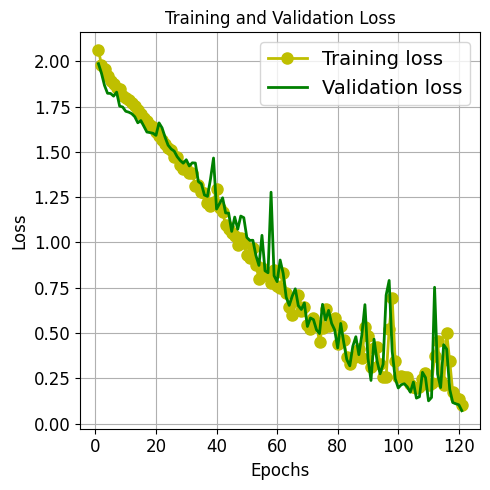

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(5, 5))

plt.plot(epochs, loss, 'y-', label='Training loss', linewidth=2, marker='o', markersize=8)
plt.plot(epochs, val_loss, 'g-', label='Validation loss', linewidth=2)

plt.title('Training and Validation Loss', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

Plot Accuracy and Validation Accuracy

<ipython-input-29-2774cfb39c1c>:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "p-" (-> marker='p'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'p-', label='Training accuracy', linewidth=2, marker='o', markersize=8)


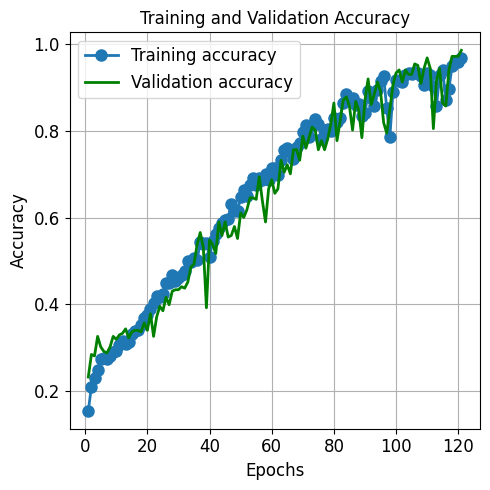

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(5, 5))
plt.plot(epochs, acc, 'p-', label='Training accuracy', linewidth=2, marker='o', markersize=8)
plt.plot(epochs, val_acc, 'g-', label='Validation accuracy', linewidth=2)

plt.title('Training and Validation Accuracy', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


Evaluation Of Model

In [31]:
model_A.evaluate(np.expand_dims(rav_array[train_samples + validate_samples:], -1), label_cat[train_samples + validate_samples:])

9/9 [==============================] - 0s 18ms/step - loss: 0.0992 - accuracy: 0.9653


[0.09917616099119186, 0.9652777910232544]

Function For Prediction

In [32]:
emotions={1 : 'neutral', 2 : 'calm', 3 : 'happy', 4 : 'sad', 5 : 'angry', 6 : 'fearful', 7 : 'disgust', 8 : 'surprised'}
def predict(wav_filepath):
  test_point=extract_mfcc(wav_filepath)
  test_point=np.reshape(test_point,newshape=(1,40,1))
  predictions=model_A.predict(test_point)
  print(emotions[np.argmax(predictions[0])+1])

In [33]:
predict('/content/drive/MyDrive/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav')

1/1 [==============================] - 1s 517ms/step
neutral


In [39]:
predict('/content/drive/MyDrive/ravdess-emotional-speech-audio/Actor_01/03-01-08-01-01-02-01.wav')


1/1 [==============================] - 0s 57ms/step
surprised


CNN MODEL

In [68]:
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [69]:
# Assuming your data is already loaded and preprocessed

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(rav_array, label_cat, test_size=0.2, random_state=42)

In [70]:
# Reshape the data to fit the CNN input shape
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)

In [71]:
# CNN Model
def create_model_CNN():
    model = keras.Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(40, 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dense(8, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [72]:
# Train the CNN model
model_CNN = create_model_CNN()
history_CNN = model_CNN.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
65/65 [==============================] - 2s 13ms/step - loss: 2.4191 - accuracy: 0.1693 - val_loss: 1.9478 - val_accuracy: 0.2857
Epoch 2/50
65/65 [==============================] - 1s 9ms/step - loss: 1.9462 - accuracy: 0.2243 - val_loss: 1.8827 - val_accuracy: 0.2381
Epoch 3/50
65/65 [==============================] - 1s 10ms/step - loss: 1.9380 - accuracy: 0.2311 - val_loss: 1.8822 - val_accuracy: 0.2424
Epoch 4/50
65/65 [==============================] - 1s 10ms/step - loss: 1.9011 - accuracy: 0.2344 - val_loss: 1.8420 - val_accuracy: 0.3203
Epoch 5/50
65/65 [==============================] - 1s 11ms/step - loss: 1.8605 - accuracy: 0.2788 - val_loss: 1.7574 - val_accuracy: 0.3680
Epoch 6/50
65/65 [==============================] - 1s 16ms/step - loss: 1.8054 - accuracy: 0.2981 - val_loss: 1.7093 - val_accuracy: 0.3550
Epoch 7/50
65/65 [==============================] - 1s 16ms/step - loss: 1.7689 - accuracy: 0.3280 - val_loss: 1.6497 - val_accuracy: 0.3939
Epoch 8/50
65/

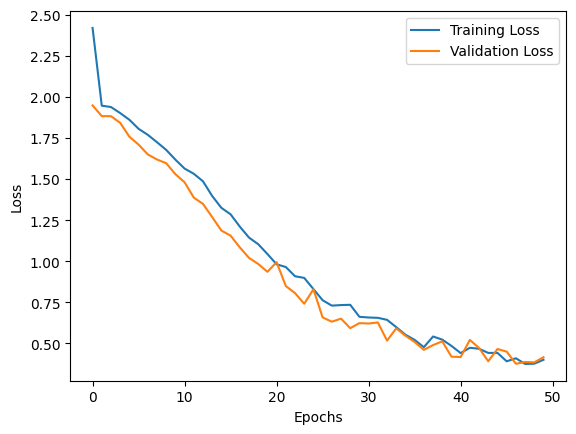

In [73]:
# Plot training and validation loss
plt.plot(history_CNN.history['loss'], label='Training Loss')
plt.plot(history_CNN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

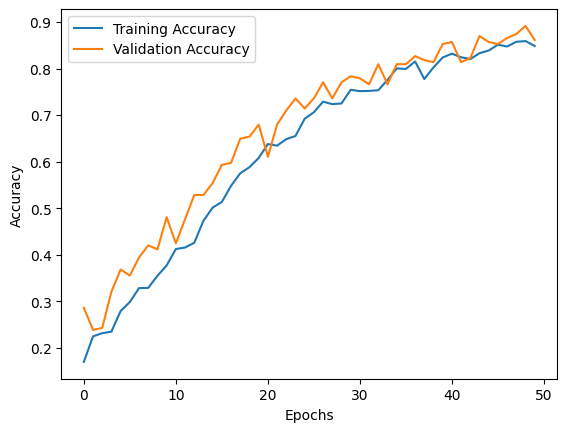

In [74]:
# Plot training and validation accuracy
plt.plot(history_CNN.history['accuracy'], label='Training Accuracy')
plt.plot(history_CNN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [75]:
# Evaluate the model on the test set
test_loss, test_accuracy = model_CNN.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

18/18 [==============================] - 0s 4ms/step - loss: 0.5567 - accuracy: 0.8264
Test Loss: 0.5566815137863159
Test Accuracy: 0.8263888955116272
